In [40]:
import csv
import urllib2
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline


# Neural Network Class definition
class NeuralNetwork:
    
    # Initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):        
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes        
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        #self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        #self.who = np.random.rand(self.onodes, self.hnodes) - 0.5        
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
                
        # scipy.special for the sigmoid function expit()           
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # Train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors split by weights, recommended at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)   # errors_hidden = weights_hidden-output.T • errors_output
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    # Query the neural network
    def query(self, inputs_list):
        
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

# create instance of neural network
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the mnist training data csv file into a list
training_data_file = open("myonn/mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network
# go thru all records in the training dataset
for record in training_data_list:
    # split the record by ','
    all_values = record.split(',')
    
    # scale and shift the inputs     
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    '''    
    rescale the input colour values from the larger range 0 to 255 to the much smaller range 0.01 - 1.0
    choose 0.01 as the lower end of the range to avoid zero valued inputs killing weight updates
    '''   
    # create the target output values (all 0.01, except the desired label 0.99)    
    targets = np.zeros(output_nodes) + 0.01
    '''
    Rescale outputs 0 and 1 because it's impossible for the activation function to output 0/1
    0 and 1 outputs would drive large weights and a saturated network
    Use the values 0.01 and 0.99 instead
    '''
    
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [46]:
# Test the neural network
# load the mnist testing data csv file into a list
testing_data_file = open("myonn/mnist_dataset/mnist_test_10.csv", 'r')
testing_data_list = testing_data_file.readlines()
testing_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in testing_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to
        scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to
        scorecard
        scorecard.append(0)
        pass
    pass

# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
4 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer
performance =  0.6


In [47]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [16]:
# Neural Network Class definition
class NeuralNetwork:
    
    # Initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):        
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes        
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        #self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        #self.who = np.random.rand(self.onodes, self.hnodes) - 0.5        
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
                
        # scipy.special for the sigmoid function expit()           
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # Train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors split by weights, recommended at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)   # errors_hidden = weights_hidden-output.T • errors_output
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    # Query the neural network
    def query(self, inputs_list):
        
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [31]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

# create instance of neural network
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the mnist training data csv file into a list
training_data_file = open("myonn/mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network
# go thru all records in the training dataset
for record in training_data_list:
    # split the record by ','
    all_values = record.split(',')
    
    # scale and shift the inputs     
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    '''    
    rescale the input colour values from the larger range 0 to 255 to the much smaller range 0.01 - 1.0
    choose 0.01 as the lower end of the range to avoid zero valued inputs killing weight updates
    '''   
    # create the target output values (all 0.01, except the desired label 0.99)    
    targets = np.zeros(output_nodes) + 0.01
    '''
    Rescale outputs 0 and 1 because it's impossible for the activation function to output 0/1
    0 and 1 outputs would drive large weights and a saturated network
    Use the values 0.01 and 0.99 instead
    '''
    
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [41]:
# load the mnist testing data csv file into a list
testing_data_file = open("myonn/mnist_dataset/mnist_test_10.csv", 'r')
testing_data_list = testing_data_file.readlines()
testing_data_file.close()

In [42]:
# get the first testing record
all_values = testing_data_list[0].split(',')
print(all_values[0])

7


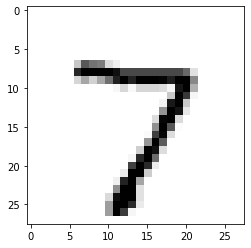

In [43]:
image_array = np.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [44]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.04237591],
       [0.00324061],
       [0.01732359],
       [0.07095158],
       [0.06005081],
       [0.01485867],
       [0.00376887],
       [0.90364536],
       [0.04729574],
       [0.03108622]])

In [54]:
import csv, urllib.request

url = 'http://www.pjreddie.com/media/files/mnist_test.csv'
response = urllib.request.urlopen(url)
lines = [l.decode('utf-8') for l in response.readlines()]
cr = csv.reader(lines)

for row in cr:
    print(row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '50', '84', '0', '0', '5', '68', '71', '49', '0', '0', '0', '0', '0', '0', '0'

In [53]:
type(cr)

_csv.reader

In [12]:
n.query([1.0, 0.5, -1.5])

array([[0.73458782],
       [0.50671074],
       [0.61528769]])

In [13]:
# training set http://www.pjreddie.com/media/files/mnist_train.csv
# test set http://www.pjreddie.com/media/files/mnist_test.csv

data_file = open("myonn/mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [38]:
len(data_list)

100

In [37]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

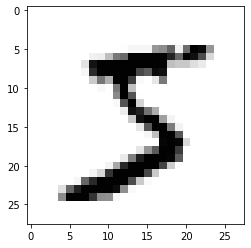

In [17]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
'''numpy.asfarray() converts the text strings into real numbers and to create an array of those numbers'''
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [21]:
'''
Rescale the input colour values from the larger range 0 to 255 to the much smaller range 0.01 - 1.0.
Choose 0.01 as the lower end of the range to avoid zero valued inputs killing weight updates.
'''
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [24]:
'''
Rescale outputs 0 and 1 because it's impossible for the activation function to output 0/1
0 and 1 outputs would drive large weights and a saturated network
Use the values 0.01 and 0.99 instead
'''
# output nodes is 10 
onodes = 10
targets = np.zeros(onodes) + 0.01    # rescale 0 as 0.01
targets[int(all_values[0])] = 0.99   # the correct index into the targets[] array for the label

In [25]:
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [22]:
int(all_values[0])

5

In [26]:
targets[int(all_values[0])]

0.99

In [27]:
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [39]:
image_array

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0